# Imports

In [62]:
from numpy.random import seed
seed(888)
import tensorflow
tensorflow.random.set_seed(404)

In [63]:
import os
import numpy as np
import tensorflow as tf
import itertools

import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

from IPython.display import display
from keras.preprocessing.image import array_to_img
from keras.callbacks import TensorBoard

from time import strftime

from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt

%matplotlib inline

# Constants

In [64]:
LOG_DIR = 'tensorboard_cifar_logs/'

LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
NR_CLASSES = 10

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

# Get the Data

In [65]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

In [66]:
type(cifar10)
type(x_train_all)

numpy.ndarray

# Explore the Data

In [67]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

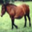

In [68]:
pic = array_to_img(x_train_all[7])
display(pic)

In [69]:
y_train_all.shape

(50000, 1)

In [70]:
y_train_all[7][0]

7

In [71]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

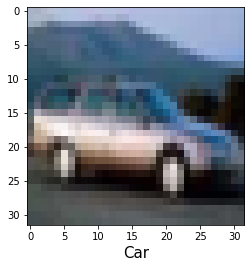

In [72]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]], fontsize=15)
plt.show()

**Challenge:** Write a for loop to display the first 10 images from the ```x_train_all``` array in a row. Show the name of the label below the picture. Remove the ugly tick marks. *Hint* use matplotlib. 

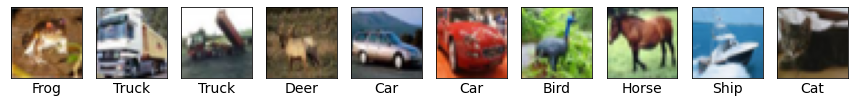

In [73]:
plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=14)
    plt.imshow(x_train_all[i])

In [74]:
x_train_all[0].shape

(32, 32, 3)

In [75]:
nr_images, x, y, c = x_train_all.shape
print(f'images = {nr_images} \t| width = {x} \t| height = {y} \t| channels = {c}')

images = 50000 	| width = 32 	| height = 32 	| channels = 3


In [76]:
x_test.shape

(10000, 32, 32, 3)

# Preprocess Data

In [77]:
type(x_train_all[0][0][0][0])

numpy.uint8

In [78]:
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0

In [79]:
x_train_all[0][0][0][0]

0.23137254901960785

In [80]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [81]:
x_train_all.shape

(50000, 3072)

In [82]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)
print(f'Shape of x_test is {x_test.shape}')

Shape of x_test is (10000, 3072)


### Create Validation Dataset

In [83]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

**Challenge:** Create two numpy arrays ```x_train``` and ```y_train``` that have the shape (40000, 3072) and (40000, 1) respectively. They need to contain the last 40000 values from ```x_train_all``` and ```y_train_all``` respectively. 

In [84]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

### Create a small dataset (for illustration)

In [85]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

# Define the Neural Network using Keras

In [86]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hidden1'),
    Dense(units=64, activation='relu', name='m1_hidden2'),
    Dense(16, activation='relu', name='m1_hidden3'),
    Dense(10, activation='softmax', name='m1_output')
])

model_1.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [87]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128, activation='relu', name='m2_hidden1'))
model_2.add(Dense(64, activation='relu', name='m2_hidden2'))
model_2.add(Dense(15, activation='relu', name='m2_hidden3'))
model_2.add(Dense(10, activation='softmax', name='m2_output'))

model_2.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

**Challenge:** Create a third model, ```model_3``` that has two dropout layers. The second dropout layer should be added after the first hidden layer and have a dropout rate of 25%. 

In [88]:
model_3 = Sequential()
model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128, activation='relu', name='m3_hidden1'))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(64, activation='relu', name='m3_hidden2'))
model_3.add(Dense(15, activation='relu', name='m3_hidden3'))
model_3.add(Dense(10, activation='softmax', name='m3_output'))

model_3.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [89]:
type(model_1)

tensorflow.python.keras.engine.sequential.Sequential

In [90]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [91]:
32*32*3*128 + 128 + (128*64 + 64) + (64*16 + 16) + (16*10 + 10)

402810

# Tensorboard (visualising learning)

In [92]:
def get_tensorboard(model_name):

    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory')

    return TensorBoard(log_dir=dir_paths)

# Fit the Model

In [93]:
samples_per_batch = 1000

In [94]:
# %%time
# nr_epochs = 150
# model_1.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, epochs=nr_epochs,
#             callbacks=[get_tensorboard('Model 1')], verbose=0, validation_data=(x_val, y_val))

In [95]:
# %%time
# nr_epochs = 150
# model_2.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, epochs=nr_epochs,
#             callbacks=[get_tensorboard('Model 2')], verbose=0, validation_data=(x_val, y_val))

In [121]:
%%time
nr_epochs = 100
model_1.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 1 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory


ProfilerNotRunningError: Cannot stop profiling. No profiler is running.

In [97]:
%%time
nr_epochs = 100
model_2.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 2 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory


ProfilerNotRunningError: Cannot stop profiling. No profiler is running.

In [98]:
%%time
nr_epochs = 100
model_3.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 2 XL')], verbose=0, validation_data=(x_val, y_val))

Cannot create a file when that file already exists


ProfilerNotRunningError: Cannot stop profiling. No profiler is running.

# Predictions on Individual Images

In [99]:
x_val[0].shape

(3072,)

In [100]:
test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [101]:
np.set_printoptions(precision=3)

In [102]:
model_2.predict(test)

array([[0.141, 0.058, 0.148, 0.078, 0.077, 0.1  , 0.066, 0.129, 0.076,
        0.126]], dtype=float32)

In [103]:
model_2.predict(x_val).shape

(10000, 10)

In [104]:
model_2.predict_classes(test)

array([2], dtype=int64)

In [105]:
y_val[0]

array([6], dtype=uint8)

**Challenge:** Write a for loop where you print out the actual value and the predicted value for the first 10 images in the valuation dataset. 

In [106]:
for number in range(10):
    test_img = np.expand_dims(x_val[number], axis=0)
    predicted_val = model_2.predict_classes(test_img)[0]
    print(f'Actual value: {y_val[number][0]} vs. predicted: {predicted_val}')

Actual value: 6 vs. predicted: 2
Actual value: 9 vs. predicted: 2
Actual value: 9 vs. predicted: 2
Actual value: 4 vs. predicted: 0
Actual value: 1 vs. predicted: 0
Actual value: 1 vs. predicted: 2
Actual value: 2 vs. predicted: 2
Actual value: 7 vs. predicted: 2
Actual value: 8 vs. predicted: 2
Actual value: 3 vs. predicted: 2


# Evaluation

In [107]:
model_2.metrics_names

['loss', 'accuracy']

In [108]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

10000/10000 [==============================] - 1s 55us/sample - loss: 2.3702 - accuracy: 0.1012
Test loss is 2.37 and test accuracy is 10.1%


### Confusion Matrix

In [109]:
predictions = model_2.predict_classes(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

In [110]:
conf_matrix.shape

(10, 10)

In [111]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [112]:
conf_matrix.max()

958

In [113]:
conf_matrix.min()

0

In [114]:
conf_matrix[0]

array([ 14,   0, 952,   0,   0,   0,   0,  16,   0,  18], dtype=int64)

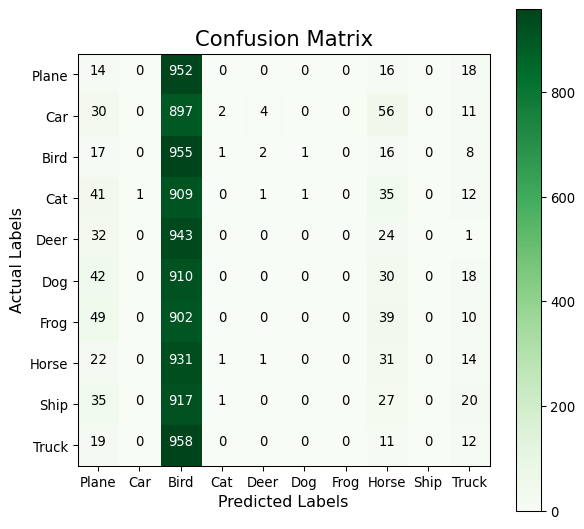

In [115]:
plt.figure(figsize=(7,7), dpi=95)
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment='center',
            color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')
    

plt.show()

**Challenge:** What do the numbers down the diagonal represent? What do the other numbers (excluding the number in the diagonal) in a single row represent? Try to identify the false positives, false negatives, and the true positives in the confusion matrix.

In [116]:
# True Positives
np.diag(conf_matrix)

array([ 14,   0, 955,   0,   0,   0,   0,  31,   0,  12], dtype=int64)

In [117]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall

array([0.014, 0.   , 0.955, 0.   , 0.   , 0.   , 0.   , 0.031, 0.   ,
       0.012])

In [118]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([0.047, 0.   , 0.103, 0.   , 0.   , 0.   ,   nan, 0.109,   nan,
       0.097])

In [119]:
avg_recall = np.mean(recall)
print(f'Model 2 recall score is {avg_recall:.2%}')

Model 2 recall score is 10.12%


**Challenge:** Calculate the average precision for the model as a whole. Print this out. Then calculate the f-score for the model as a whole. 

In [120]:
avg_precision = np.mean(precision)
print(f'Model 2 precision score is {avg_precision:.2%}')

f1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
print(f'Model 2 f score is {f1_score:.2%}')

Model 2 precision score is nan%
Model 2 f score is nan%
